In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv("Mall_Customers.csv")

# **Exploring the dataset**

In [3]:
# Returns number of rows and columns of the dataset
df.shape

(200, 5)

In [4]:
# Returns an object with all of the column headers 
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Returns the last x number of rows when tail(x). Without a number it returns 5
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
# Returns true for a column having null values, else false
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# **Data Cleaning**

In [11]:
# Creating the copy of dataset
df_copy = df.copy(deep=True)

In [12]:
df_copy.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [13]:
# Dropping the column of 'CustomerID' as it does not provide any value
df_copy.drop('CustomerID', axis=1, inplace=True)
df_copy.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# **Data Visualization**

In [14]:
# Loading essential libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_copy.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## Gender Plot

Text(0, 0.5, 'Count')

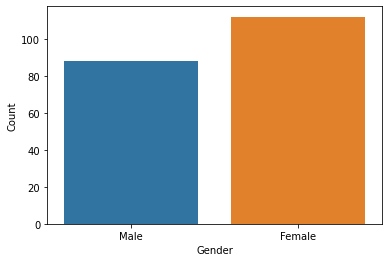

In [16]:
# Visualising the columns 'Gender' using Countplot
sns.countplot(x='Gender', data=df_copy)
plt.xlabel('Gender')
plt.ylabel('Count')

**Gender plot - Observation**

*From the Count plot it is observed that the number of Female customers are more that the total number of Male customers.*

## Age Plot

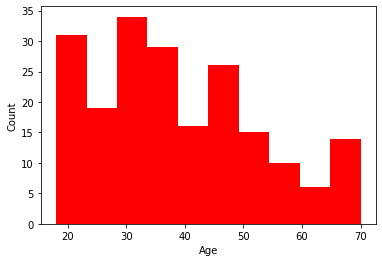

In [17]:
# Visualising the columns 'Age' using Histogram
plt.hist(x=df_copy['Age'], bins=10, orientation='vertical', color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Age plot - Observation**

*From the Histogram it is evident that there are 3 age groups that are more frequently shop at the mall, they are: 15-22 years, 30-40 years and 45-50 years.*

## Age Vs Spending Score

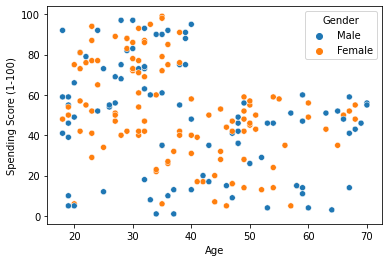

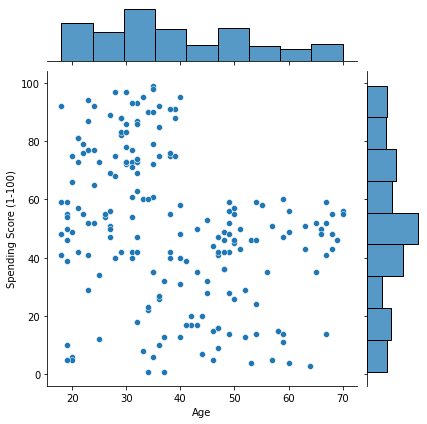

In [18]:
# Visualising the columns 'Age', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=df_copy, x='Age', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df_copy, x='Age', y='Spending Score (1-100)')

**Age Vs Spending Score - Observation**

*1. From the Age Vs Spending Score plot we observe that customers whose spending score is more than 65 have their Age in the range of 15-42 years. Also from the Scatter plot it is observed that customers whose spending score is more than 65 consists of more Females than Males.*

*2. Also, the customers having average spending score ie: in the range of 40-60 consists of age group of the range 15-75 years and the count of Male and Female in this age group is also approximatly the same.*


## Annual Income Vs Spending Score

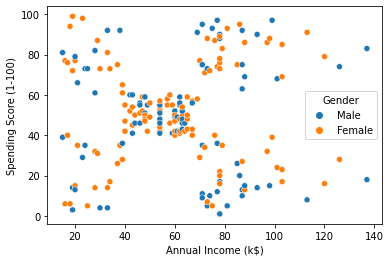

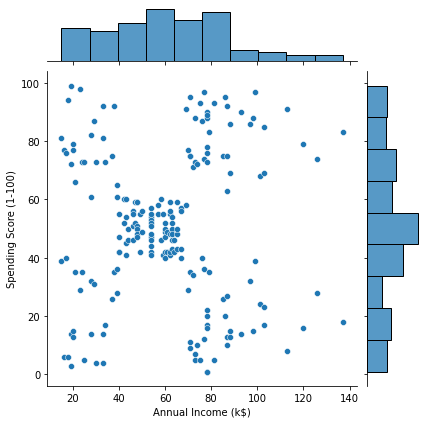

In [19]:
# Visualising the columns 'Annual Income (k$)', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
sns.jointplot(data=df_copy, x='Annual Income (k$)', y='Spending Score (1-100)')

**Annual Income Vs Spending Score - Observation**

*From the Annual Income Vs Spending Score plot we observe that there are 5 clusters and can be categorised as:*

---

*a. High Income, High Spending Score (Top Right Cluster)*

*b. High Income, Low Spending Score (Bottom Right Cluster)*

*c. Average Income, Average Spending Score (Center Cluster)*

*d. Low Income, High Spending Score (Top Left Cluster)*

*e. Low Income, Low Spending Score (Bottom Left Cluster)*

# **Data Preprocessing**

In [20]:
# Selecting 'Annual Income' and 'Spending Score' as the features for clustering
X = df_copy.iloc[:, [2,3]]

In [21]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## Finding optimal number of clusters using Elbow Method

In [22]:
# Calculating WCSS values for 1 to 10 clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_model.fit(X)
  wcss.append(kmeans_model.inertia_)

C:\Users\usaip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


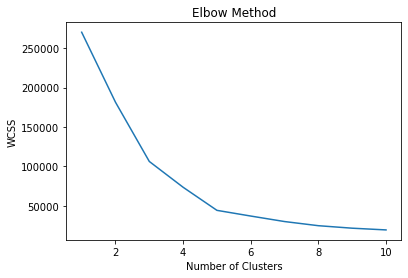

In [23]:
# Plotting the WCSS values
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

*From the above plot it is observed that **5 clusters** are optimal for the given dataset.*

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

*Feature Scaling is performed because KMeans uses Distance (Euclidean, Manhattan, etc.) and the model perfoms faster on scaling the values*

# **Model Building**

In [25]:
# Training the KMeans model with n_clusters=5
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)

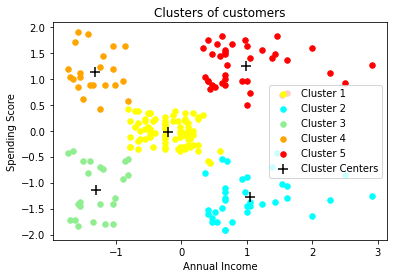

In [26]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Clustering - Observation**

a. High Income, High Spending Score (Cluster 5) - *Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.*

*b. High Income, Low Spending Score (Cluster 3) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.*

c. Average Income, Average Spending Score (Cluster 2) - *Can target these set of customers by providing them with Low cost EMI's etc.*

d. Low Income, High Spending Score (Cluster 1) - *May or may not target these group of customers based on the policy of the mall.*

e. Low Income, Low Spending Score (Cluster 4) - *Don't target these customers since they have less income and need to save money.*

In [33]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_pca = pca.fit_transform(X)
 
explained_variance = pca.explained_variance_ratio_

In [34]:
explained_variance

array([0.50495142, 0.49504858])

([<matplotlib.axis.XTick at 0x27242eca490>,
 [Text(0, 0, ''), Text(0, 0, '')])

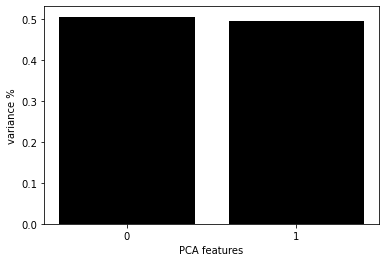

In [35]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [36]:
PCA_components = pd.DataFrame(X_pca)

Text(0, 0.5, 'PCA 2')

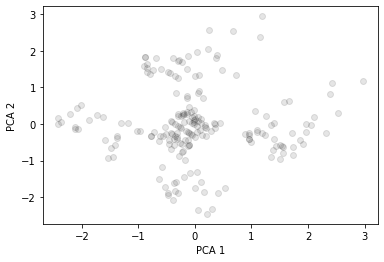

In [37]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

C:\Users\usaip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


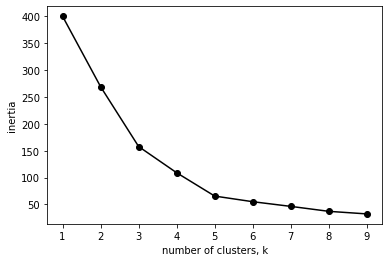

In [38]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [41]:
kmeans_model_pca= KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans_pca = kmeans_model_pca.fit_predict(X_pca)

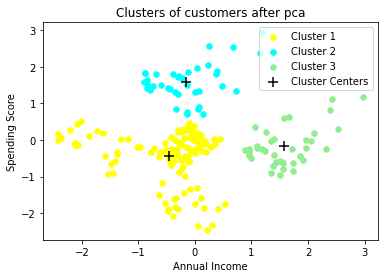

In [40]:
# Visualising the clusters
plt.scatter(X_pca[y_kmeans_pca == 0, 0], X[y_kmeans_pca == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans_pca == 1, 0], X_pca[y_kmeans_pca == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans_pca == 2, 0], X_pca[y_kmeans_pca == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')

plt.scatter(x=kmeans_model_pca.cluster_centers_[:, 0], y=kmeans_model_pca.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers after pca')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [43]:
from sklearn import metrics

The Silhouette Score and Silhouette Plot are used to measure the separation distance between clusters. It displays a measure of how close each point in a cluster is to points in the neighbouring clusters. This measure has a range of [-1, 1] and is a great tool to visually inspect the similarities within clusters and differences across clusters.

In [44]:
metrics.silhouette_score(X, y_kmeans,random_state=42)

0.46658474418951484

The Davies-Bouldin Index is defined as the average similarity measure of each cluster with its most similar cluster. Similarity is the ratio of within-cluster distances to between-cluster distances. In this way, clusters which are farther apart and less dispersed will lead to a better score.

In [45]:
metrics.davies_bouldin_score(X, y_kmeans)

0.7164821569435488

The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. The C-H Index is a great way to evaluate the performance of a Clustering algorithm as it does not require information on the ground truth labels.

In [46]:
metrics.calinski_harabasz_score(X, y_kmeans)

151.33512126359477

In [47]:
metrics.silhouette_score(X_pca, y_kmeans_pca,random_state=42)

0.46658474419000145

In [48]:
metrics.davies_bouldin_score(X_pca, y_kmeans_pca)

0.7164821569435488

In [49]:
metrics.calinski_harabasz_score(X_pca, y_kmeans_pca)

151.3351212635948

Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

It is a part of a broader class of hierarchical clustering method.


It is implemented via the AgglomerativeClustering class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data.

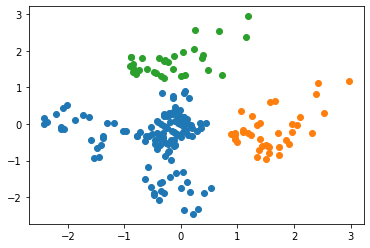

In [52]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
yhat = model.fit_predict(X)
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
# get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

In [53]:
metrics.silhouette_score(X, yhat,random_state=42)

0.46104814465658095

In [54]:
metrics.davies_bouldin_score(X, yhat)


0.7072871869794293

In [55]:
metrics.calinski_harabasz_score(X_pca, y_kmeans_pca)

151.3351212635948

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

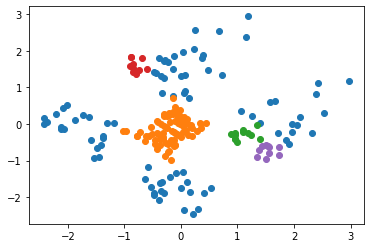

In [58]:
from sklearn.cluster import DBSCAN
model2 = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat2 = model2.fit_predict(X)
# retrieve unique clusters
clusters2 = np.unique(yhat2)
# create scatter plot for samples from each cluster
for cluster in clusters2:
# get row indexes for samples with this cluster
    row_ix = np.where(yhat2 == cluster)
	# create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

It is implemented via the MiniBatchKMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.



C:\Users\usaip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


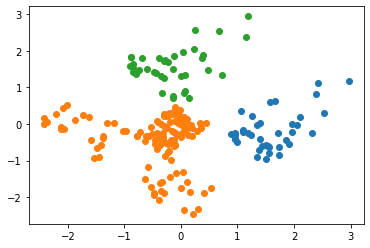

In [60]:
from sklearn.cluster import MiniBatchKMeans
model3 = MiniBatchKMeans(n_clusters=3)

model3.fit(X)

yhat3 = model3.predict(X)
# retrieve unique clusters
clusters3 = np.unique(yhat3)
# create scatter plot for samples from each cluster
for cluster in clusters3:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat3 == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()